# 双色球历史数据统计预测

---

- 报告题目：双色球历史数据统计预测
- 学员昵称：hcccom
- 课程期数：第一期

© 本文著作权归作者所有，并授权实验楼独家使用，未经实验楼许可，不得转载使用。

---

### 获取数据

In [ ]:
import random
import numpy as np
import requests
import csv
from bs4 import BeautifulSoup
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'}
res = requests.get(
    'https://datachart.500.com/ssq/history/newinc/history.php?start=03001&end=18147', headers=headers)  # 从03年第一期开始
res.encoding = 'uft-8'
soup = BeautifulSoup(res.text, 'lxml')
data = soup.find_all(attrs={'class': 't_tr1'})
csvFile = open("./ssq004.csv", 'wt', newline='', encoding='utf-8')

In [ ]:
def gens(x):  # 模拟
    random.seed(x)
    a = np.arange(1, 34, 1).tolist()
    red = sorted(random.sample(a, 6))
    b = np.arange(1, 17, 1).tolist()
    blue = random.sample(b, 1)
    red.extend(blue)
    return red

In [8]:
with open(r"ssq004.csv", 'a', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["period", "real", "date", "vis", 'r1',
                     'r2', 'r3', 'r4', 'r5', 'r6', 'b1'])  # 先写入列名
    for i in range(0, len(data)):
        period = data[i].find_all('td')[0].text
        real = [int(data[i].find_all('td')[1].text), int(data[i].find_all('td')[2].text), int(data[i].find_all('td')[3].text), int(data[i].find_all(
            'td')[4].text), int(data[i].find_all('td')[5].text), int(data[i].find_all('td')[6].text), int(data[i].find_all('td')[7].text)]
        date = data[i].find_all('td')[15].text
        vis = gens(date)
        r1 = int(data[i].find_all('td')[1].text)
        r2 = int(data[i].find_all('td')[2].text)
        r3 = int(data[i].find_all('td')[3].text)
        r4 = int(data[i].find_all('td')[4].text)
        r5 = int(data[i].find_all('td')[5].text)
        r6 = int(data[i].find_all('td')[6].text)
        b1 = int(data[i].find_all('td')[7].text)

        writer.writerows(
            [[period, real, date, vis, r1, r2, r3, r4, r5, r6, b1]])
csvFile.close()

### 数据处理

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('ssq004.csv', encoding='gbk')
df.set_index("date", inplace=True)
df.index = pd.DatetimeIndex(df.index)
df.sort_index(ascending=True, inplace=True)


def get_real(i):
    a = df.real[i]
    lista = a.strip('[]').split(',')
    map(int, lista)
    list_real = [int(x) for x in lista]
    return list_real


def get_vis(i):  # 产生和时间相关的随机双色球
    b = df.vis[i]
    listb = b.strip('[]').split(',')
    map(int, listb)
    list_vis = [int(x) for x in listb]
    return list_vis


get_vis(1)

[3, 6, 8, 23, 25, 33, 4]

In [ ]:
# 计算每个球出现的频率

In [10]:
df1 = df.drop(columns=['period', 'real', 'vis'])
df2 = df1.drop(columns=['b1'])
df3 = df1[['b1']]
dup = df1[df1.duplicated()].count()
rd1 = df2.stack().value_counts()
bd1 = df3['b1'].value_counts()

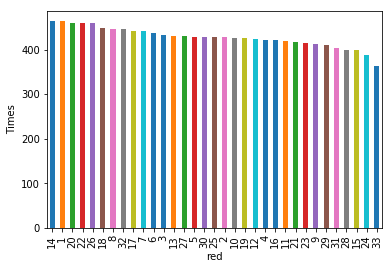

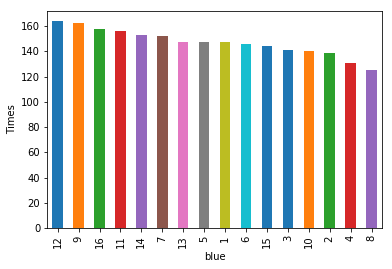

In [11]:
import matplotlib.pyplot as plt
from pylab import *
plt.figure(111)
rd1.plot(kind='bar', align='center')
plt.xlabel("red")
plt.ylabel("Times")
plt.show()
plt.figure(112)
bd1.plot(kind='bar')
plt.xlabel("blue")
plt.ylabel("Times")
plt.show()

### 取一组
 

In [14]:
df.tail(5)

,period,real,vis,r1,r2,r3,r4,r5,r6,b1
date,,,,,,,,,,
2018-12-04,18142,"[5, 8, 10, 11, 27, 28, 11]","[11, 13, 16, 24, 29, 31, 8]",5,8,10,11,27,28,11
2018-12-06,18143,"[4, 6, 15, 28, 32, 33, 14]","[10, 14, 15, 16, 24, 33, 14]",4,6,15,28,32,33,14
2018-12-09,18144,"[8, 13, 17, 18, 20, 27, 13]","[3, 7, 13, 17, 19, 30, 13]",8,13,17,18,20,27,13
2018-12-11,18145,"[3, 9, 13, 22, 23, 25, 6]","[3, 6, 10, 12, 19, 25, 12]",3,9,13,22,23,25,6
2018-12-13,18146,"[2, 10, 11, 17, 18, 29, 16]","[6, 10, 21, 24, 26, 32, 3]",2,10,11,17,18,29,16


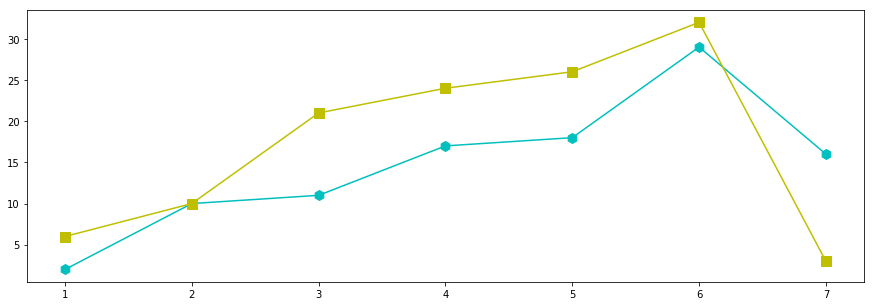

In [15]:
x = [1, 2, 3, 4, 5, 6, 7]
y1 = get_real(-1)
y2 = get_vis(-1)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x, y1, 'ch-', markersize=10)
ax.plot(x, y2, 'ys-', markersize=10)

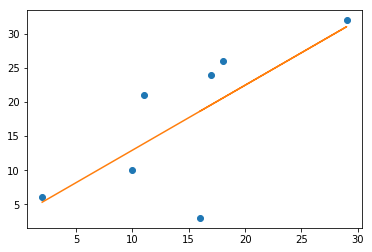

array([0.95333787, 3.40088556])

In [167]:
x_data = np.array(y1)

y_data = np.array(y2)

poly = np.polyfit(x_data, y_data, deg=1)

plt.plot(x_data, y_data, 'o')

plt.plot(x_data, np.polyval(poly, x_data))

plt.show()
poly

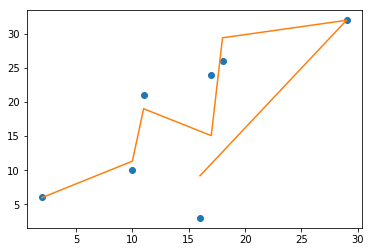

array([-2.44332198e-03,  1.76012475e-01, -4.58949704e+00,  5.31642494e+01,
       -2.57338653e+02,  3.41987935e+02])

In [7]:
x_data = np.array(y1)

y_data = np.array(y2)

poly = np.polyfit(x_data, y_data, deg=5)

plt.plot(x_data, y_data, 'o')

plt.plot(x_data, np.polyval(poly, x_data))

plt.show()
poly

各种分析过后，仍无法做出预测。。。。。

结论：双色球是无法预测的

---

#### 评阅意见反馈

<div style="color: #666; font-size: 10px;">
hcccom 提交的《双色球历史数据统计预测》项目挑战报告初步达到课程挑战要求，但仍然有很多地方值得完善。
<br><br>
数据采集部分内容不错，能采集完整的双色球投注数据。但缺乏必要的解释和代码注释。数据分析和处理阶段仅对各号球的出现频次做了统计，选择的柱形图虽然合理但内容较为单薄。这里，建议可以对连续 2 球或者多球的出现频次统计分析。或者分析不同位置各号球的出现频次，或许从统计学角度更有意义。
<br><br>
「取一组」小节之后没有看明白分析的用意，或许是想预测各号球如何出现？不过这样肯定无法完成的。回归分析显然不能用于这里的预测过程。
<br><br>
总之，该挑战报告有 2 点值得改善的地方：

- 补充陈述内容，让阅读者知道每一步的大致操作用意。整个分析报告几乎没有解释性语句，非常不赞同这样做。数据分析的过程很重要，实际上阐述结论和讲好一个故事更加重要。

- 分析思路没有理清，显然双色球出现是随机事件，这是无法通过回归分析完成的。所以，挑战的选题从一开始就不太理想。实际上，就算是真实的数据分析任务，也不建议去做彩票预测，因为就算从概率上得到了一些高频次组合方式，但没有明确的指导意义。

代码方面，注意不用写重复冗余代码（类似 plt.show() 在同单元格多次出现）。后期在书写代码时注意按照 PEP8 格式化即可。VS Code 等 IDE 带有相关格式化插件，Jupyter Notebook 也可以通过安装 jupyter_contrib_nbextensions 拓展开启相关插件自动完成代码格式化。
<br><br>
总之，通过该报告可以判定学员初步达到我们课程预设的培养目标，但仍需要继续学习和加深对数据分析各环节的思考。希望 hcccom 后续再通过书籍等拓展更多相关的数据分析和挖掘知识，并结合自己的兴趣及专业特长在数据分析的道路上越走越好。
</div>

<br><br><br>
<div style="color: #666; font-size: 10px; text-align: right;">楼+ 数据分析和挖掘课程组</div>
<div style="color: #666; font-size: 10px; text-align: right;">2018 年 12 月 17 日</div>

---